<a href="https://colab.research.google.com/github/jhbellingrath/CS-290-Classwork/blob/main/notebooks/k_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def dist(X,Y):
  total=0
  for i in range(len(X)):
    total+=(X[i]-Y[i])**2
  return np.sqrt(total)

In [ ]:
df = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")
df=df.drop(columns=["species"]) #dropping all of the categorical variables
df=df.drop(columns=["sex"])
df=df.drop(columns=["island"])
df=df.drop(columns=["year"])
df=df.drop(3) #getting rid of the NaNs
df=df.drop(271)

In [ ]:
len(df)

342

In [ ]:
##setting up initial centroids
k=3
initials=[100,200,300]

In [ ]:
def avg(X): ##inputs a list,X
  averages=[]
  for i in range(len(df.iloc[0])): #loops through the attributes
    sum=0
    for j in range(len(X)): #loops through the terms in the list
      sum+=df.iloc[X[j]][i]
    if(len(X)==0):
      averages.append(0)
    else:
      averages.append(sum/len(X))
  return averages

In [ ]:
def make_clusters(df,centroids):
  clusters=[]
  for i in range(k): #makes the initial empty cluster lists
    clusters.append([])
  for i in range(len(df)):
    index=0  ##stores which cluster the datapoints will be included in
    best=np.Infinity
    for j in range(len(centroids)):
      if(dist(centroids[j],df.iloc[i])<best):
        index=j
        best=dist(centroids[j],df.iloc[i])
    clusters[index].append(i)
  return clusters

In [ ]:
def k_mean(df):
  centroids=[]
  for i in range(len(initials)): ##creates initial centroid list
    temp=[]
    for j in range(len(df.iloc[0])):
      temp.append(df.iloc[initials[i]][j])
    centroids.append(temp)
  while(1>0):
    clusters=make_clusters(df,centroids)
    ##at this point each of the datapoints is in a cluster
    for i in range(k):
      #making the plot
      #make_plot(df,clusters)
      if(centroids[i]==avg(clusters[i])):
        return centroids
      centroids[i]=avg(clusters[i])

In [ ]:
k_mean(df)

<ipython-input-162-3f90cc355083>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp.append(df.iloc[initials[i]][j])
<ipython-input-156-1df5cbdfdc2e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total+=(X[i]-Y[i])**2


[[45.0018018018018, 16.588288288288293, 206.07207207207207, 4512.612612612613],
 [49.30655737704919, 15.649180327868853, 221.0655737704918, 5501.639344262295],
 [41.49999999999998, 18.095454545454547, 190.64772727272728, 3550.0]]

In [ ]:
centroids=[df.iloc[100],df.iloc[200],df.iloc[300]]
#print(centroids[0][0])
clusters=make_clusters(df,centroids)
print(avg([3,271]))
#print(df.iloc[1][1])
#print(avg([1,2,3]))

<ipython-input-141-1df5cbdfdc2e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total+=(X[i]-Y[i])**2


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
def make_plot(df,clusters):
  dftemp=df
  print(df)
  dftemp["target"]=dftemp.index
  dftemp["target"]=dftemp["target"].apply(catagorize)
  dftemp
  plt.figure(figsize=(5, 3))
  sns.scatterplot( x = "bill_length_mm", y = "flipper_length_mm", data = dftemp, hue = "target")
  #sns.scatterplot( x = "petal length (cm)", y = "petal width (cm)", data = centroids, c = "black", marker="X", s = 100);

In [ ]:
def catagorize(x):
  if(x in clusters[0]):
    return "green"
  if(x in clusters[1]):
    return "red"
  if(x in clusters[2]):
    return "blue"
  else:
    return "black"

In [ ]:
clusters

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g target
0              39.1           18.7              181.0       3750.0   blue
1              39.5           17.4              186.0       3800.0   blue
2              40.3           18.0              195.0       3250.0   blue
4              36.7           19.3              193.0       3450.0   blue
5              39.3           20.6              190.0       3650.0   blue
..              ...            ...                ...          ...    ...
339            55.8           19.8              207.0       4000.0   blue
340            43.5           18.1              202.0       3400.0  green
341            49.6           18.2              193.0       3775.0   blue
342            50.8           19.0              210.0       4100.0  black
343            50.2           18.7              198.0       3775.0  black

[342 rows x 5 columns]


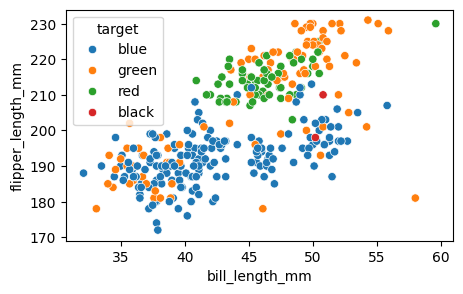